In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pyneb as pn

In [2]:
print(pn.__version__)

1.1.2c


# The Atom object

In [3]:
O3 = pn.Atom('O',3)
print(O3)

Atom O3 from o_iii_atom_FFT04-SZ00.dat and o_iii_coll_SSB14.dat


In [4]:
#O3.TAB

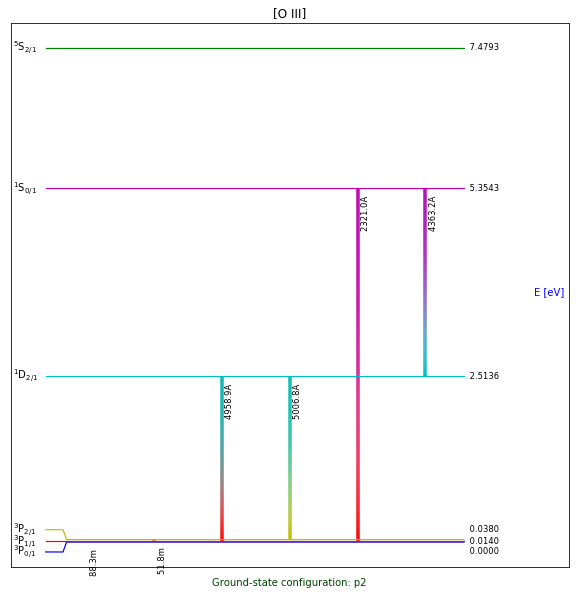

In [5]:
f, ax = plt.subplots(figsize=(10,10))
O3.plotGrotrian(ax=ax)

In [6]:
O3.printIonic(tem=1e4, den=1e2)

elem = O
spec = 3
temperature = 10000.0 K
density =  100.0 cm-3

Level   Populations  Critical densities
Level 1:  7.816E-01  0.000E+00
Level 2:  1.939E-01  5.009E+02
Level 3:  2.448E-02  3.530E+03
Level 4:  4.309E-06  6.912E+05
Level 5:  2.972E-10  2.423E+07

     88.33m 
    (2-->1) 
  1.132E-21 

     32.65m      51.80m 
    (3-->1)     (3-->2) 
  4.512E-28   9.040E-22 

   4931.23A    4958.91A    5006.84A 
    (4-->1)     (4-->2)     (4-->3) 
  4.030E-25   1.172E-21   3.497E-21 

   2314.87A    2320.95A    2331.40A    4363.21A 
    (5-->1)     (5-->2)     (5-->3)     (5-->4) 
  0.000E+00   5.734E-24   1.771E-26   2.279E-23 

# H-beta volume emissivity:
1.235E-25 N(H+) * N(e-)  (erg/s)


In [7]:
S2 = pn.Atom('S',2, NLevels=5)
print(S2)

Atom S2 from s_ii_atom_PKW09.dat and s_ii_coll_TZ10.dat


## Diagnostic line ratios

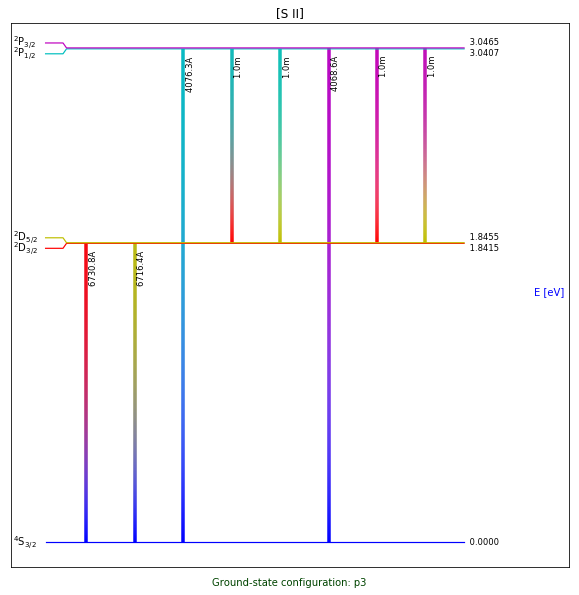

In [8]:
f, ax = plt.subplots(figsize=(10,10))
S2.plotGrotrian(ax=ax)

In [9]:
den = np.logspace(1, 6, 100)
print(den)

[  1.00000000e+01   1.12332403e+01   1.26185688e+01   1.41747416e+01
   1.59228279e+01   1.78864953e+01   2.00923300e+01   2.25701972e+01
   2.53536449e+01   2.84803587e+01   3.19926714e+01   3.59381366e+01
   4.03701726e+01   4.53487851e+01   5.09413801e+01   5.72236766e+01
   6.42807312e+01   7.22080902e+01   8.11130831e+01   9.11162756e+01
   1.02353102e+02   1.14975700e+02   1.29154967e+02   1.45082878e+02
   1.62975083e+02   1.83073828e+02   2.05651231e+02   2.31012970e+02
   2.59502421e+02   2.91505306e+02   3.27454916e+02   3.67837977e+02
   4.13201240e+02   4.64158883e+02   5.21400829e+02   5.85702082e+02
   6.57933225e+02   7.39072203e+02   8.30217568e+02   9.32603347e+02
   1.04761575e+03   1.17681195e+03   1.32194115e+03   1.48496826e+03
   1.66810054e+03   1.87381742e+03   2.10490414e+03   2.36448941e+03
   2.65608778e+03   2.98364724e+03   3.35160265e+03   3.76493581e+03
   4.22924287e+03   4.75081016e+03   5.33669923e+03   5.99484250e+03
   6.73415066e+03   7.56463328e+03

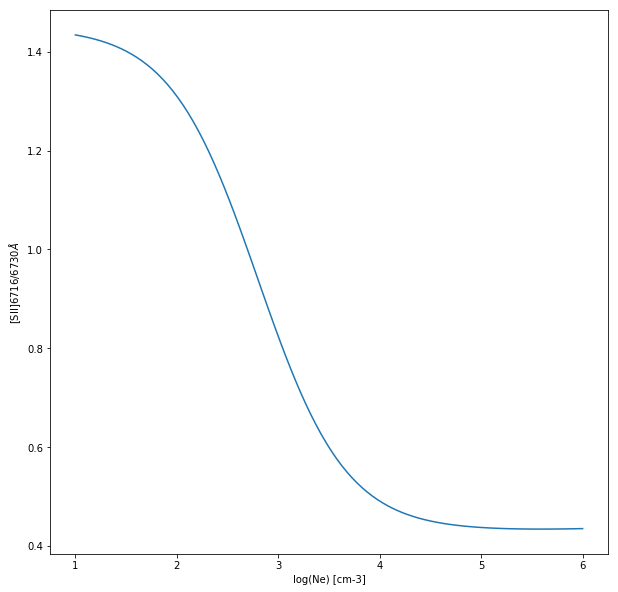

In [10]:
f, ax = plt.subplots(figsize=(10,10))
E_6730 = S2.getEmissivity(tem=1e4, den=den, wave=6730)
E_6716 = S2.getEmissivity(tem=1e4, den=den, wave=6716)
ax.plot(np.log10(den), E_6716/E_6730)
ax.set_xlabel('log(Ne) [cm-3]')
ax.set_ylabel(r'[SII]6716/6730$\AA$')

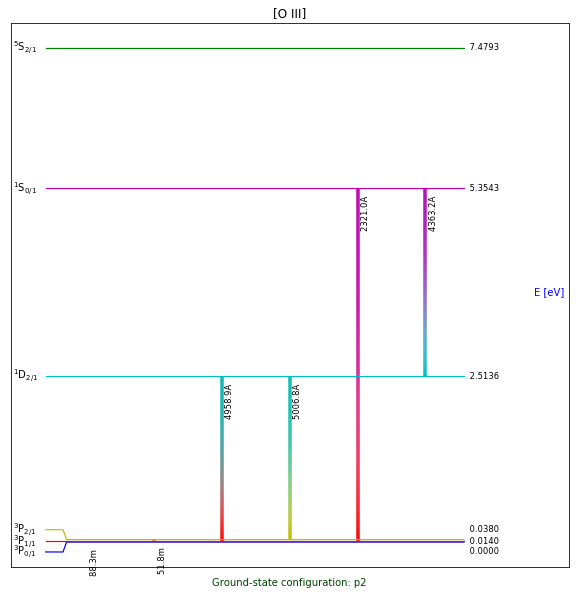

In [11]:
f, ax = plt.subplots(figsize=(10,10))
O3.plotGrotrian(ax=ax)

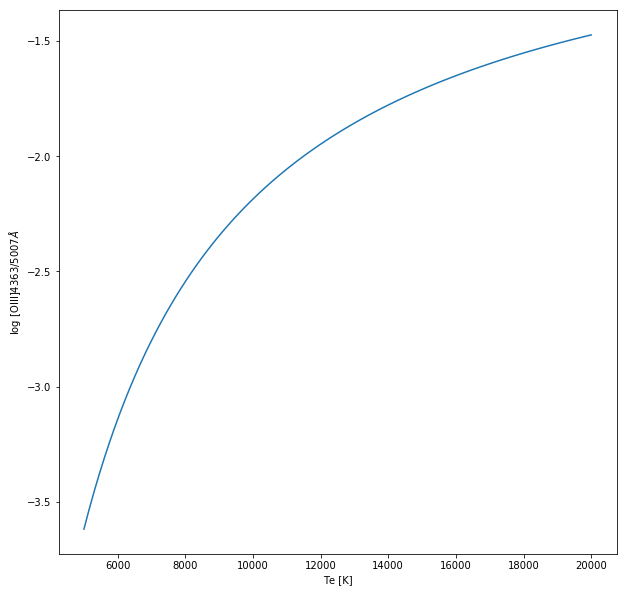

In [12]:
tem = np.linspace(5000, 20000, 100)
E_5007 = O3.getEmissivity(tem=tem, den=1e2, wave=5007)
E_4363 = O3.getEmissivity(tem=tem, den=1e2, wave=4363)
f, ax = plt.subplots(figsize=(10,10))
ax.plot(tem, np.log10(E_4363/E_5007))
ax.set_xlabel('Te [K]')
ax.set_ylabel(r'log [OIII]4363/5007$\AA$')

In [13]:
O3_EG = pn.EmisGrid('O', 3)

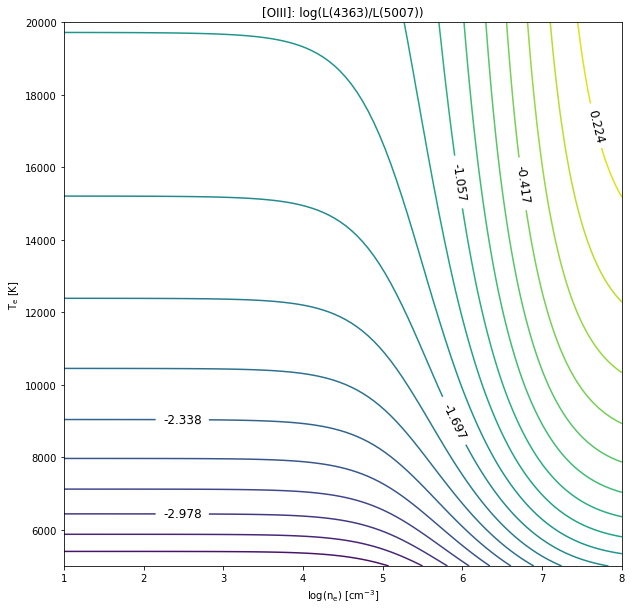

In [14]:
f, ax = plt.subplots(figsize=(10,10))
O3_EG.plotContours(to_eval = 'L(4363)/L(5007)', ax=ax)

## Recombination lines

In [15]:
h1 = pn.RecAtom('H',1)
he1 = pn.RecAtom('He',1)

In [16]:
tem = np.linspace(5000, 20000, 100)
den = 1e3

hb = h1.getEmissivity(tem, den, label='4_2')
he1_4471 = he1.getEmissivity(tem, 1e4, label='4471.0')
he1_6678 = he1.getEmissivity(tem, 1e4, label='6678.0')
he1_7065 = he1.getEmissivity(tem, 1e4, label='7065.0')

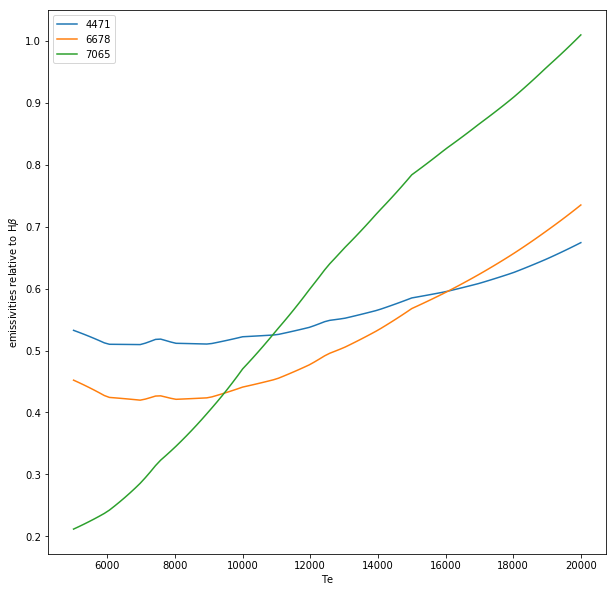

In [17]:
f, ax = plt.subplots(figsize=(10,10))

ax.plot(tem, he1_4471/hb, label='4471')
ax.plot(tem, he1_6678/hb, label='6678')
ax.plot(tem, he1_7065/hb, label='7065')
ax.legend()
ax.set_xlabel('Te')
ax.set_ylabel(r'emissivities relative to H$\beta$')

## Diagnostic diagrams

In [18]:
%%writefile observations1.dat
LINE SMC_24
S4_10.5m   7.00000
Ne2_12.8m  8.3000
Ne3_15.6m 34.10
S3_18.7m  10.
O2_3726A  39.700
O2_3729A  18.600
Ne3_3869A 18.90
S2_4069A   0.85
S2_4076A   0.450
O3_4363A   4.36
H1r_4861A 100.00
O3_5007A 435.09
N2_5755A   0.510000
S3_6312A   0.76
O1_6300A   1.69
O1_6364A   0.54
H1r_6563A   3.45
N2_6584A  19.00
S2_6716A   1.220000
S2_6731A   2.180000
Ar3_7136A  4.91
O2_7319A+   6.540000
O2_7330A+   5.17


Overwriting observations1.dat


In [19]:
obs = pn.Observation()
obs.readData('observations1.dat', fileFormat='lines_in_rows', err_default=0.05) # fill obs with data read from observations1.dat
obs.def_EBV(label1="H1r_6563A", label2="H1r_4861A", r_theo=2.85)
obs.correctData(normWave=4861.)

In [20]:
diags = pn.Diagnostics()
diags.addDiagsFromObs(obs)

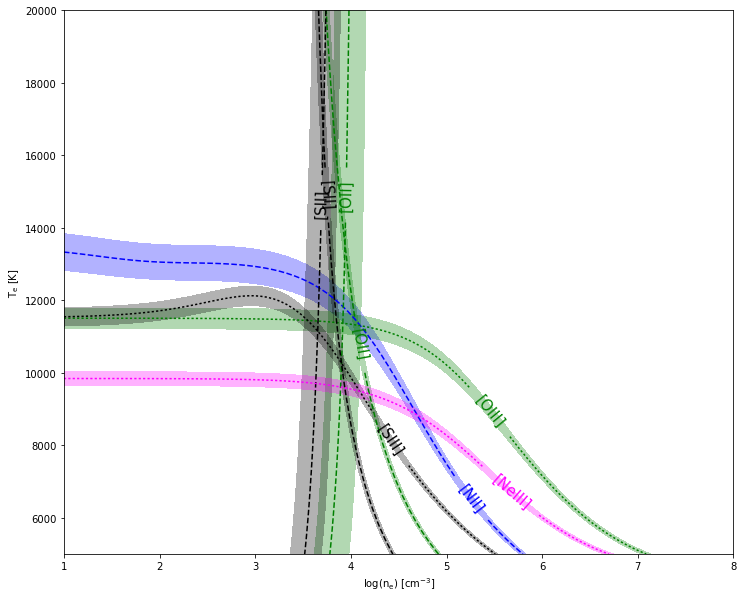

In [21]:
emisgrids = pn.getEmisGridDict(atomDict=diags.atomDict)
f, ax = plt.subplots(figsize=(12,10))
diags.plot(emisgrids, obs, ax=ax)

## Te-Ne cross determination

In [22]:
emisgrids = pn.getEmisGridDict(atom_list=['O2', 'O3', 'N2'])

In [23]:
diags = pn.Diagnostics() # instantiate the Diagnostic class

In [24]:
temp, dens = diags.getCrossTemDen('[NII] 5755/6584', '[SII] 6731/6716', obs=obs)
print(temp, dens)
temp, dens = diags.getCrossTemDen('[OIII] 4363/5007', '[SII] 6731/6716', obs=obs)
print(temp, dens)

12343.8272139 4661.64390559
11424.7248683 4543.45809363


## Ionic abundances determination

In [25]:
all_atoms = pn.getAtomDict(atom_list=obs.getUniqueAtoms())
print(all_atoms)

warng _ManageAtomicData: rec data not available for Ar3
warng _ManageAtomicData: atom data not available for H1
warng _ManageAtomicData: coll data not available for H1
warng _ManageAtomicData: rec data not available for Ne2
warng _ManageAtomicData: rec data not available for Ne3
warng _ManageAtomicData: rec data not available for S2
warng _ManageAtomicData: rec data not available for S3
warng _ManageAtomicData: rec data not available for S4
{'Ar3': Atom Ar3 from ar_iii_atom_MB09.dat and ar_iii_coll_MB09.dat, 'H1rr': Atom H1 from h_i_rec_SH95.hdf5, 'N2': Atom N2 from n_ii_atom_FFT04.dat and n_ii_coll_T11.dat, 'N2r': Atom N2 from n_ii_rec_P91.func, 'Ne2': Atom Ne2 from ne_ii_atom_Bal06.dat and ne_ii_coll_GMB01.dat, 'Ne3': Atom Ne3 from ne_iii_atom_GMZ97.dat and ne_iii_coll_McLB00.dat, 'O1': Atom O1 from o_i_atom_WFD96.dat and o_i_coll_BK95.dat, 'O1r': Atom O1 from o_i_rec_P91.func, 'O2': Atom O2 from o_ii_atom_FFT04.dat and o_ii_coll_Kal09.dat, 'O2r': Atom O2 from o_ii_rec_SSB17-B-opt.hd

In [26]:
line_ab = {}
ion_ab = {}
for line in obs.getSortedLines():
    if line.atom != 'H1r':
        line_ab[line.label] = all_atoms[line.atom].getIonAbundance(line.corrIntens, temp, dens, 
                                                      to_eval=line.to_eval)
        if line.atom not in ion_ab:
            ion_ab[line.atom] = []
        ion_ab[line.atom].append(line_ab[line.label][0])

In [27]:
for label in line_ab:
    print('{:10s}: {:4.2f}'.format(label, 12+np.log10(line_ab[label][0])))

Ar3_7136A : 5.48
N2_5755A  : 6.54
N2_6584A  : 6.47
Ne2_12.8m : 7.02
Ne3_15.6m : 7.34
Ne3_3869A : 7.09
O1_6300A  : 6.31
O1_6364A  : 6.31
O2_3726A  : 7.34
O2_3729A  : 7.29
O2_7319A+ : 7.65
O2_7330A+ : 7.62
O3_4363A  : 8.00
O3_5007A  : 7.99
S2_4069A  : 5.17
S2_4076A  : 5.39
S2_6716A  : 5.09
S2_6731A  : 5.09
S3_18.7m  : 6.02
S3_6312A  : 5.99
S4_10.5m  : 5.34


In [28]:
for ion in ion_ab:
    print(ion, ion_ab[ion])

Ar3 [3.0328228410815195e-07]
N2 [3.4519286860545832e-06, 2.9329616282169165e-06]
Ne2 [1.0355058925694297e-05]
Ne3 [2.1738552508756907e-05, 1.2379614829893709e-05]
O1 [2.0341041105213988e-06, 2.0350366941982298e-06]
O2 [2.2043669755107181e-05, 1.9328049797804378e-05, 4.4763601425215495e-05, 4.1459381731851875e-05]
O3 [9.8868866498444871e-05, 9.879727155547362e-05]
S2 [1.4950277770560457e-07, 2.4617971600674204e-07, 1.2226469473957567e-07, 1.2222592739319081e-07]
S3 [1.0509248347000196e-06, 9.6828040516932959e-07]
S4 [2.1703065299696409e-07]


In [29]:
for atom in ion_ab:
    mean = np.mean(np.asarray(ion_ab[atom]))
    ion_ab[atom] = mean
    print('{:4s}: {:4.2f}'.format(atom, 12+np.log10(mean)))

Ar3 : 5.48
N2  : 6.50
Ne2 : 7.02
Ne3 : 7.23
O1  : 6.31
O2  : 7.50
O3  : 7.99
S2  : 5.20
S3  : 6.00
S4  : 5.34
